<a href="https://www.kaggle.com/dorsaalh/airbnb?scriptVersionId=87664859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pylab
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#I don't think we need 'name', and 'host_name' columns. so, I just drop them.
data = data.drop(["name", "host_name"], axis=1)

In [5]:
#checking for null values.
data.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#check if the null values of 'last_review' and 'reviews_per_month' belong to same rows.
all(data['last_review'].isnull()==data['reviews_per_month'].isnull())

True

In [7]:
#I don't know if I should give up on rows which have null values. I think I justt drop them for now.
data = data.dropna(axis=0, subset=["last_review"])

In [8]:
data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
len(data)

38843

In [10]:
all_data = data
data = data.sample(n=12000)

In [11]:
data.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43122,33455408,251817021,Manhattan,Hell's Kitchen,40.76769,-73.98681,Shared room,95,1,4,2019-06-08,2.22,5,19
4155,2686412,13384586,Brooklyn,Clinton Hill,40.68274,-73.96487,Private room,49,3,74,2019-06-17,1.16,1,284
16533,13246042,278393,Brooklyn,Bushwick,40.69798,-73.92462,Private room,52,1,132,2019-06-19,3.59,3,74
4677,3281606,16509287,Manhattan,Harlem,40.80002,-73.95559,Private room,155,2,14,2018-12-09,0.23,1,172
13384,10039579,7727013,Manhattan,Harlem,40.81184,-73.94287,Entire home/apt,226,3,61,2019-06-22,2.57,2,276


In [12]:
#Done with processig the data I guess.

In [13]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


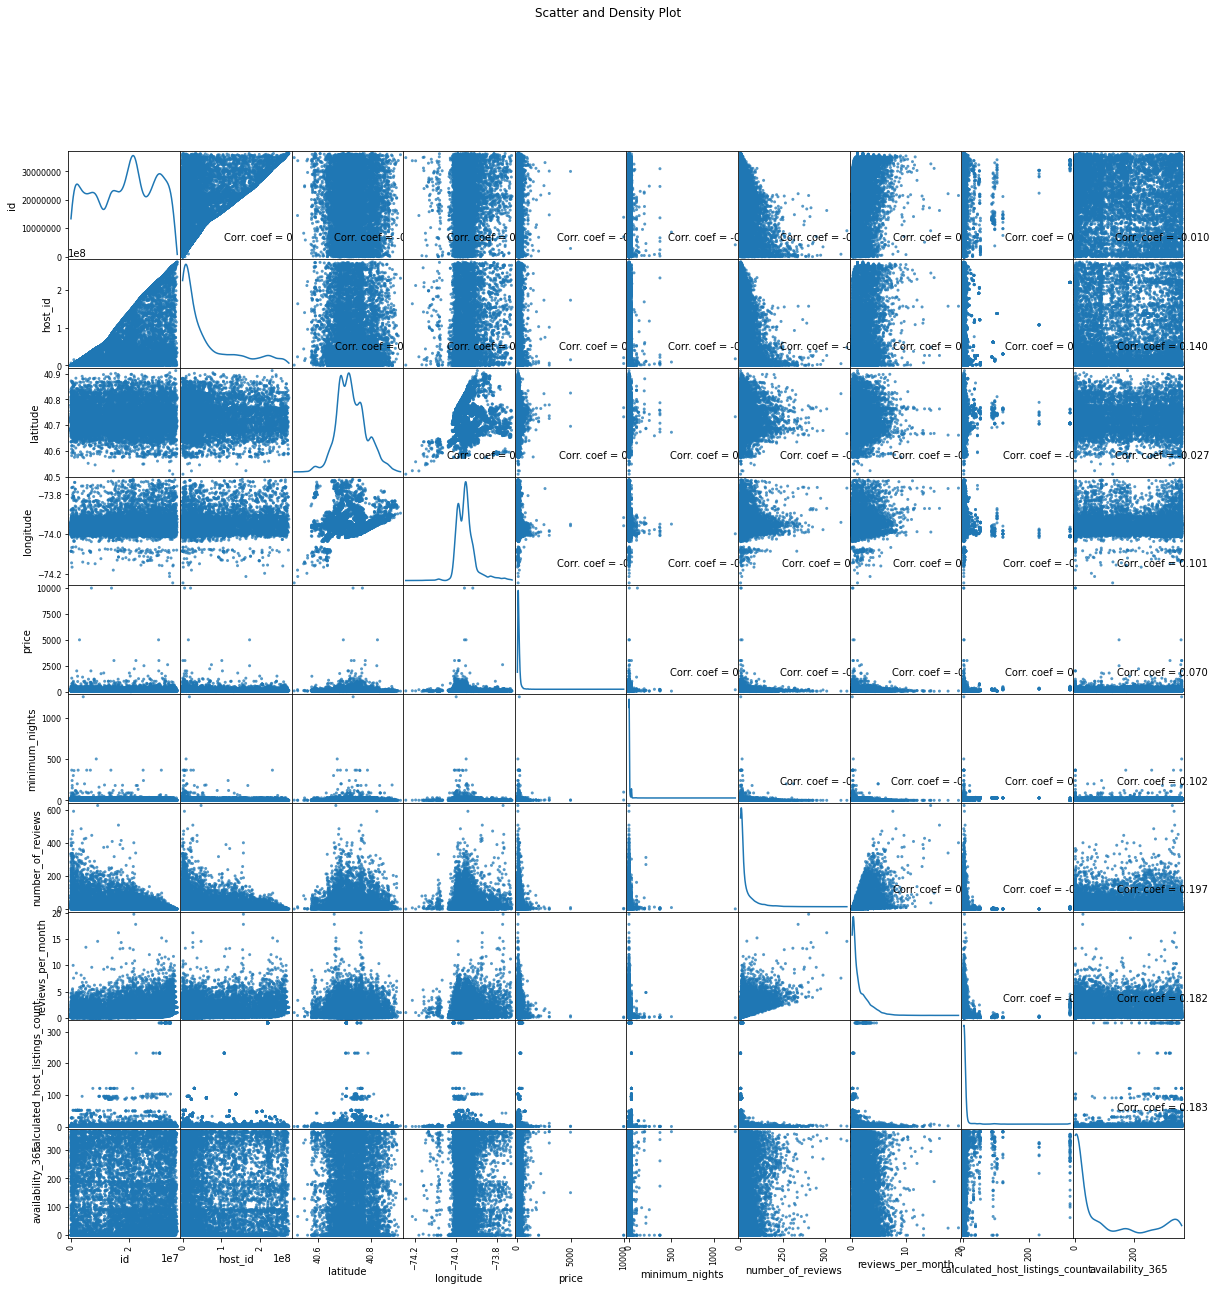

In [14]:
plotScatterMatrix(data, 20, 10)

In [15]:
#The first question is 'What can we learn about different hosts and areas?'.
#I am going to sort the data by hosts and also areas.
print("Areas:" , set(data['neighbourhood_group']))

Areas: {'Bronx', 'Manhattan', 'Staten Island', 'Queens', 'Brooklyn'}


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


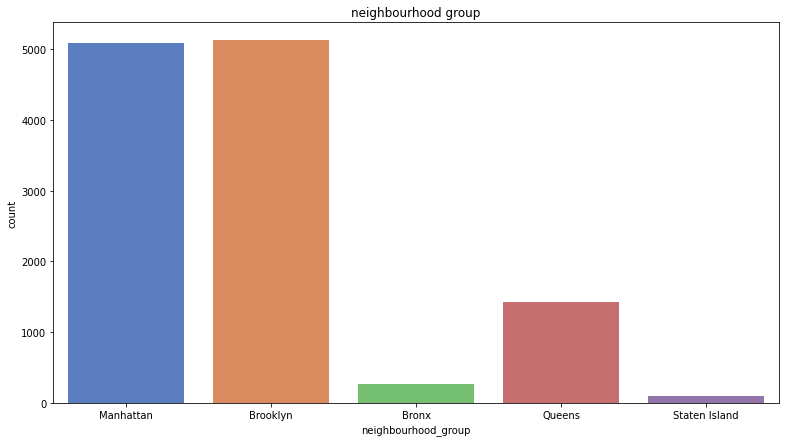

In [16]:
plt.figure(figsize=(13,7))
plt.title("neighbourhood group")
sns.countplot(data.neighbourhood_group, palette="muted")
fig = plt.gcf()
plt.show()

<AxesSubplot:ylabel='neighbourhood_group'>

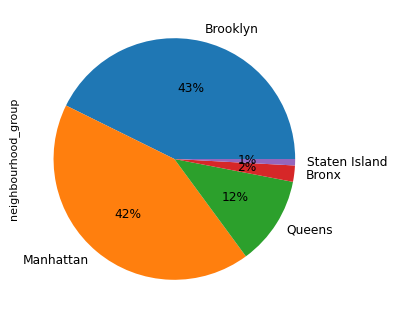

In [17]:
fig = plt.figure(figsize=(5,5), dpi=80)
data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=11)

In [18]:
print("Neighbourhood:" , data.neighbourhood.value_counts())

Neighbourhood: Bedford-Stuyvesant    1014
Williamsburg           992
Harlem                 660
Bushwick               570
Hell's Kitchen         477
                      ... 
Edgemere                 1
Midland Beach            1
Tottenville              1
West Farms               1
Graniteville             1
Name: neighbourhood, Length: 198, dtype: int64


In [19]:
print("Room types:" , set(data['room_type']))

Room types: {'Shared room', 'Private room', 'Entire home/apt'}


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


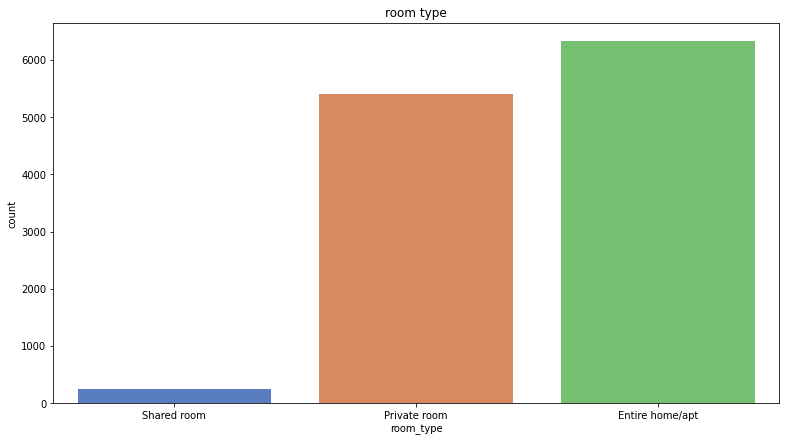

In [20]:
plt.figure(figsize=(13,7))
plt.title("room type")
sns.countplot(data.room_type, palette="muted")
fig = plt.gcf()
plt.show()

<AxesSubplot:ylabel='room_type'>

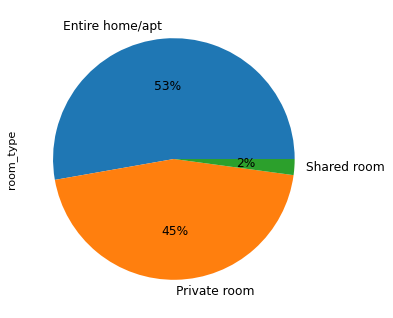

In [21]:
fig = plt.figure(figsize=(5,5), dpi=80)
data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=11)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


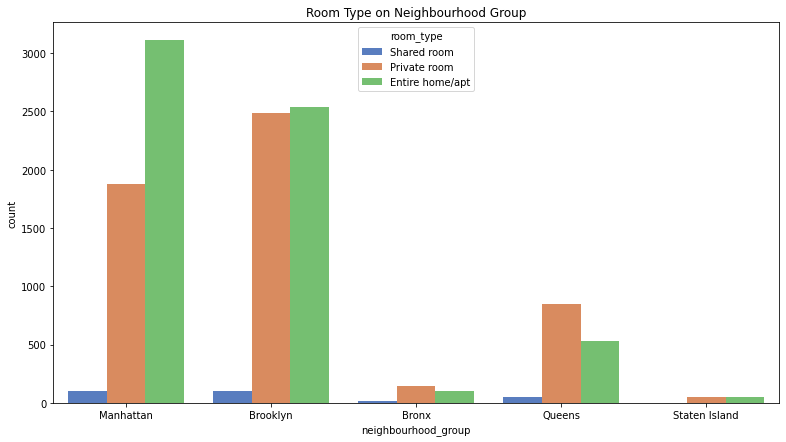

In [22]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data.neighbourhood_group,hue=data.room_type, palette="muted")
plt.show()

In [23]:
top_host = data.host_id.value_counts(sort=True).head(25).to_frame()
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'hostid', 'host_id':'count'}, inplace=True)
top_host

,hostid,count
0,219517861,63
1,61391963,29
2,16098958,17
3,7503643,17
4,22541573,16
5,30283594,15
6,137358866,14
7,25237492,12
8,190921808,12
9,2119276,11


In [24]:
top_host.describe()

,hostid,count
count,2.500000e+01,25.000000
mean,7.962592e+07,13.880000
std,8.009357e+07,11.192706
min,3.106700e+05,7.000000
25%,1.609896e+07,9.000000
50%,3.028359e+07,11.000000
75%,1.373589e+08,14.000000
max,2.244141e+08,63.000000


[Text(0, 0, '310670'),
 Text(1, 0, '1475015'),
 Text(2, 0, '2119276'),
 Text(3, 0, '7503643'),
 Text(4, 0, '12243051'),
 Text(5, 0, '13347167'),
 Text(6, 0, '16098958'),
 Text(7, 0, '16437254'),
 Text(8, 0, '19303369'),
 Text(9, 0, '22541573'),
 Text(10, 0, '25237492'),
 Text(11, 0, '26377263'),
 Text(12, 0, '30283594'),
 Text(13, 0, '50760546'),
 Text(14, 0, '61391963'),
 Text(15, 0, '107434423'),
 Text(16, 0, '119669058'),
 Text(17, 0, '120762452'),
 Text(18, 0, '137358866'),
 Text(19, 0, '159091490'),
 Text(20, 0, '190921808'),
 Text(21, 0, '201015598'),
 Text(22, 0, '205031545'),
 Text(23, 0, '219517861'),
 Text(24, 0, '224414117')]

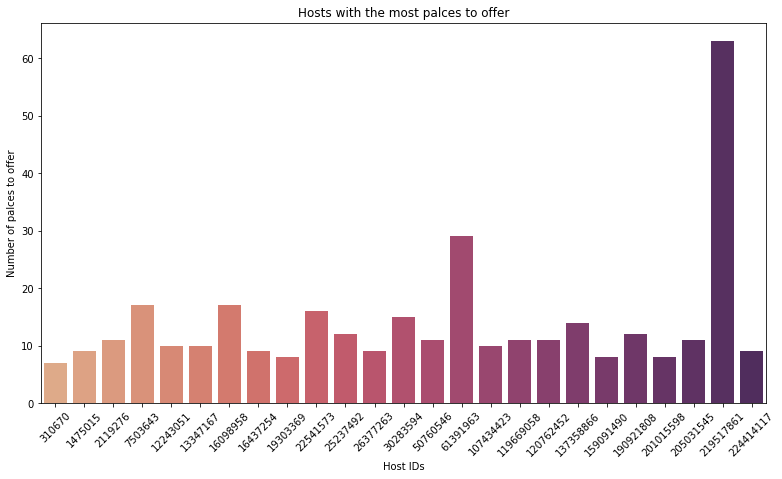

In [25]:
fig ,ax = plt.subplots(figsize=(13,7))
fig = sns.barplot(x="hostid", y="count", data=top_host,
                 palette='flare', ax=ax)
fig.set_title('Hosts with the most palces to offer')
fig.set_ylabel('Number of palces to offer')
fig.set_xlabel('Host IDs')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

In [26]:
data[data['host_id'] == 219517861].neighbourhood_group.value_counts()

Manhattan    63
Name: neighbourhood_group, dtype: int64

In [27]:
data[data['host_id'] == 219517861].neighbourhood.value_counts()

Financial District    55
Murray Hill            5
Theater District       2
Upper East Side        1
Name: neighbourhood, dtype: int64

In [28]:
for i in top_host.loc[:, 'hostid']:
    print('* Host with id of ', i, ',neighbourhood group.')
    print(data[data['host_id'] == i].neighbourhood_group.value_counts())

* Host with id of  219517861 ,neighbourhood group.
Manhattan    63
Name: neighbourhood_group, dtype: int64
* Host with id of  61391963 ,neighbourhood group.
Manhattan    29
Name: neighbourhood_group, dtype: int64
* Host with id of  16098958 ,neighbourhood group.
Manhattan    17
Name: neighbourhood_group, dtype: int64
* Host with id of  7503643 ,neighbourhood group.
Brooklyn    17
Name: neighbourhood_group, dtype: int64
* Host with id of  22541573 ,neighbourhood group.
Manhattan    15
Brooklyn      1
Name: neighbourhood_group, dtype: int64
* Host with id of  30283594 ,neighbourhood group.
Manhattan    15
Name: neighbourhood_group, dtype: int64
* Host with id of  137358866 ,neighbourhood group.
Queens       12
Manhattan     1
Brooklyn      1
Name: neighbourhood_group, dtype: int64
* Host with id of  25237492 ,neighbourhood group.
Manhattan    12
Name: neighbourhood_group, dtype: int64
* Host with id of  190921808 ,neighbourhood group.
Manhattan    12
Name: neighbourhood_group, dtype: int

In [29]:
top_reviews = data.number_of_reviews.sort_values(ascending=False).head(9).to_frame()
top_reviews.reset_index(inplace=True)
top_reviews.rename(columns={'index':'hostid', 'number_of_reviews':'number of reviews'}, inplace=True)
top_reviews

,hostid,number of reviews
0,11759,629
1,2015,594
2,20403,510
3,4870,488
4,1271,474
5,1103,454
6,9323,448
7,7086,430
8,137,426


[Text(0, 0, '137'),
 Text(1, 0, '1103'),
 Text(2, 0, '1271'),
 Text(3, 0, '2015'),
 Text(4, 0, '4870'),
 Text(5, 0, '7086'),
 Text(6, 0, '9323'),
 Text(7, 0, '11759'),
 Text(8, 0, '20403')]

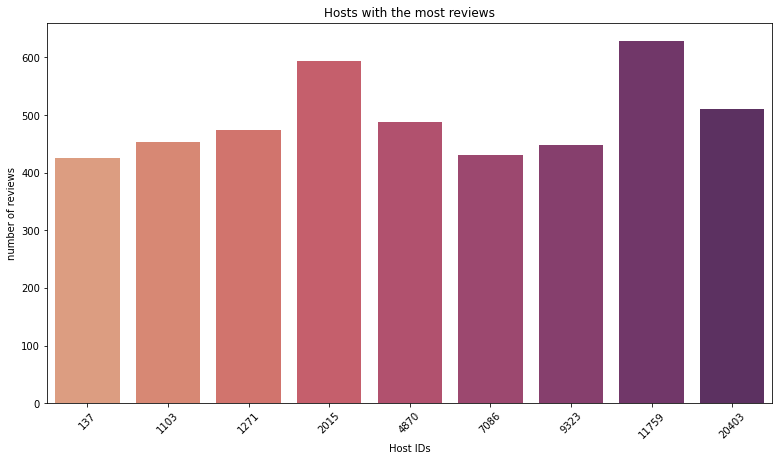

In [30]:
fig ,ax = plt.subplots(figsize=(13,7))
fig = sns.barplot(x="hostid", y="number of reviews", data=top_reviews,
                 palette='flare', ax=ax)
fig.set_title('Hosts with the most reviews')
fig.set_ylabel('number of reviews')
fig.set_xlabel('Host IDs')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

In [31]:
data.price.describe

<bound method NDFrame.describe of 43122     95
4155      49
16533     52
4677     155
13384    226
        ... 
392      200
24054    179
31786    190
4135      69
11001     51
Name: price, Length: 12000, dtype: int64>

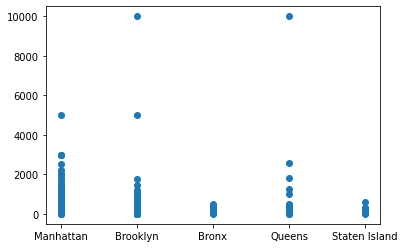

In [32]:
plt.scatter(data.neighbourhood_group, data.price)

In [33]:
#using ANOVA test to find out the relation between area and price.

print("Average price in Brooklyn:      ", statistics.mean(data[data['neighbourhood_group'] == 'Brooklyn'].price))
print("Average price in Manhattan:     ", statistics.mean(data[data['neighbourhood_group'] == 'Manhattan'].price))
print("Average price in Queens:        ", statistics.mean(data[data['neighbourhood_group'] == 'Queens'].price))
print("Average price in Staten Island: ", statistics.mean(data[data['neighbourhood_group'] == 'Staten Island'].price))
print("Average price in Bronx:         ", statistics.mean(data[data['neighbourhood_group'] == 'Bronx'].price))

Average price in Brooklyn:       122.61533957845434
Average price in Manhattan:      178.9209750344014
Average price in Queens:         102.36140350877193
Average price in Staten Island:  91.98058252427184
Average price in Bronx:          78.63984674329502


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb2335cf90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb23364850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb2335cb50>,
 'medians': [<matplotlib.lines.Line2D at 0x7ffb232f0150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb232f0590>,
 'means': []}

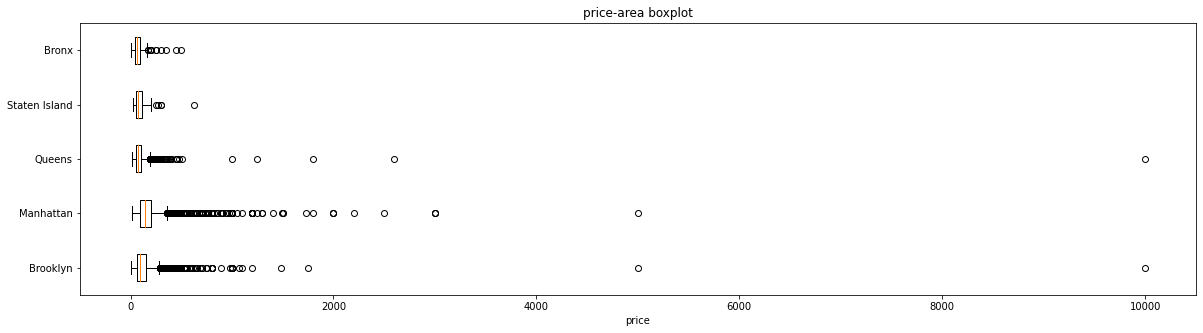

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('price-area boxplot')
ax.set_xlabel('price')
ax.set_yticklabels(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])
ax.boxplot([data[data['neighbourhood_group']=='Brooklyn'].price,
            data[data['neighbourhood_group']=='Manhattan'].price, 
            data[data['neighbourhood_group']=='Queens'].price,
            data[data['neighbourhood_group']=='Staten Island'].price,
            data[data['neighbourhood_group']=='Bronx'].price],
            vert=False)

In [35]:
F, p = stats.f_oneway(data[data['neighbourhood_group']=='Brooklyn'].price,
                      data[data['neighbourhood_group']=='Manhattan'].price,
                      data[data['neighbourhood_group']=='Queens'].price,
                      data[data['neighbourhood_group']=='Staten Island'].price,
                      data[data['neighbourhood_group']=='Bronx'].price)

# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.4f' % (F, p))

F-Statistic=81.216, p=0.0000


In [36]:
print("Average price of Shared room:      ", statistics.mean(data[data['room_type']=='Shared room'].price))
print("Average price of Private room:     ", statistics.mean(data[data['room_type']=='Private room'].price))
print("Average price of Entire home/apt:  ", statistics.mean(data[data['room_type']=='Entire home/apt'].price))


Average price of Shared room:       73.578125
Average price of Private room:      83.4059497413156
Average price of Entire home/apt:   196.4761528742893


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb23236c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb232529d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb23252710>,
 'medians': [<matplotlib.lines.Line2D at 0x7ffb2325d2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb2325d710>,
 'means': []}

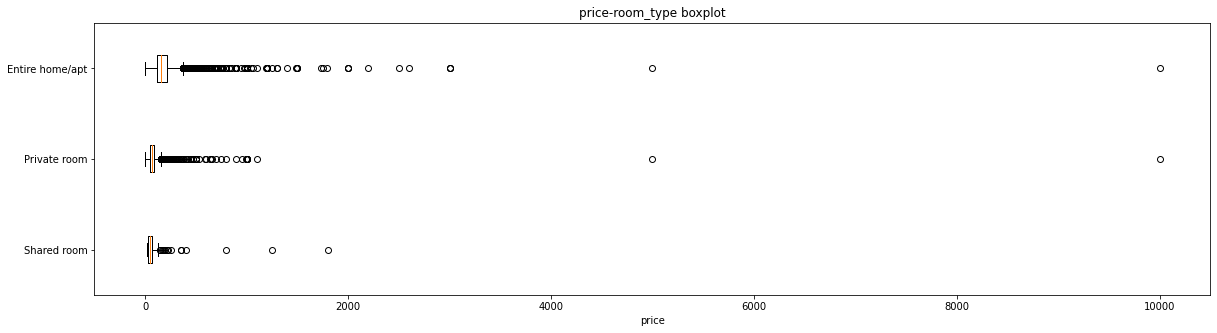

In [37]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('price-room_type boxplot')
ax.set_xlabel('price')
ax.set_yticklabels(['Shared room', 'Private room', 'Entire home/apt'])
ax.boxplot([data[data['room_type']=='Shared room'].price,
            data[data['room_type']=='Private room'].price, 
            data[data['room_type']=='Entire home/apt'].price],
            vert=False)

In [38]:
F, p = stats.f_oneway(data[data['room_type']=='Shared room'].price,
                      data[data['room_type']=='Private room'].price,
                      data[data['room_type']=='Entire home/apt'].price,
                      )


print('F-Statistic=%.3f, p=%.4f' % (F, p))

F-Statistic=536.052, p=0.0000


In [39]:
stats.ttest_ind(data[data['room_type']=='Shared room'].price,
                data[data['room_type']=='Private room'].price)

Ttest_indResult(statistic=-0.9476191858058057, pvalue=0.34336376798194)

<AxesSubplot:title={'center':'price'}, xlabel='[1, 3, 1, 2, 3, 3, 3, 7, 1, 1, 2, 3, 8, 7, 1, 4, 1, 2, 1, 1, 2, 2, 7, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 2, 4, 10, 2, 1, 2, 1, 4, 30, 3, 2, 2, 1, 1, 3, 2, 4, 29, 7, 2, 1, 5, 4, 5, 30, 2, 3, 2, 3, 3, 2, 2, 3, 8, 1, 1, 2, 2, 1, 2, 90, 1, 1, 2, 1, 14, 3, 1, 5, 5, 2, 3, 3, 5, 2, 20, 3, 3, 2, 2, 1, 1, 16, 1, 1, 5, 28, ...]'>

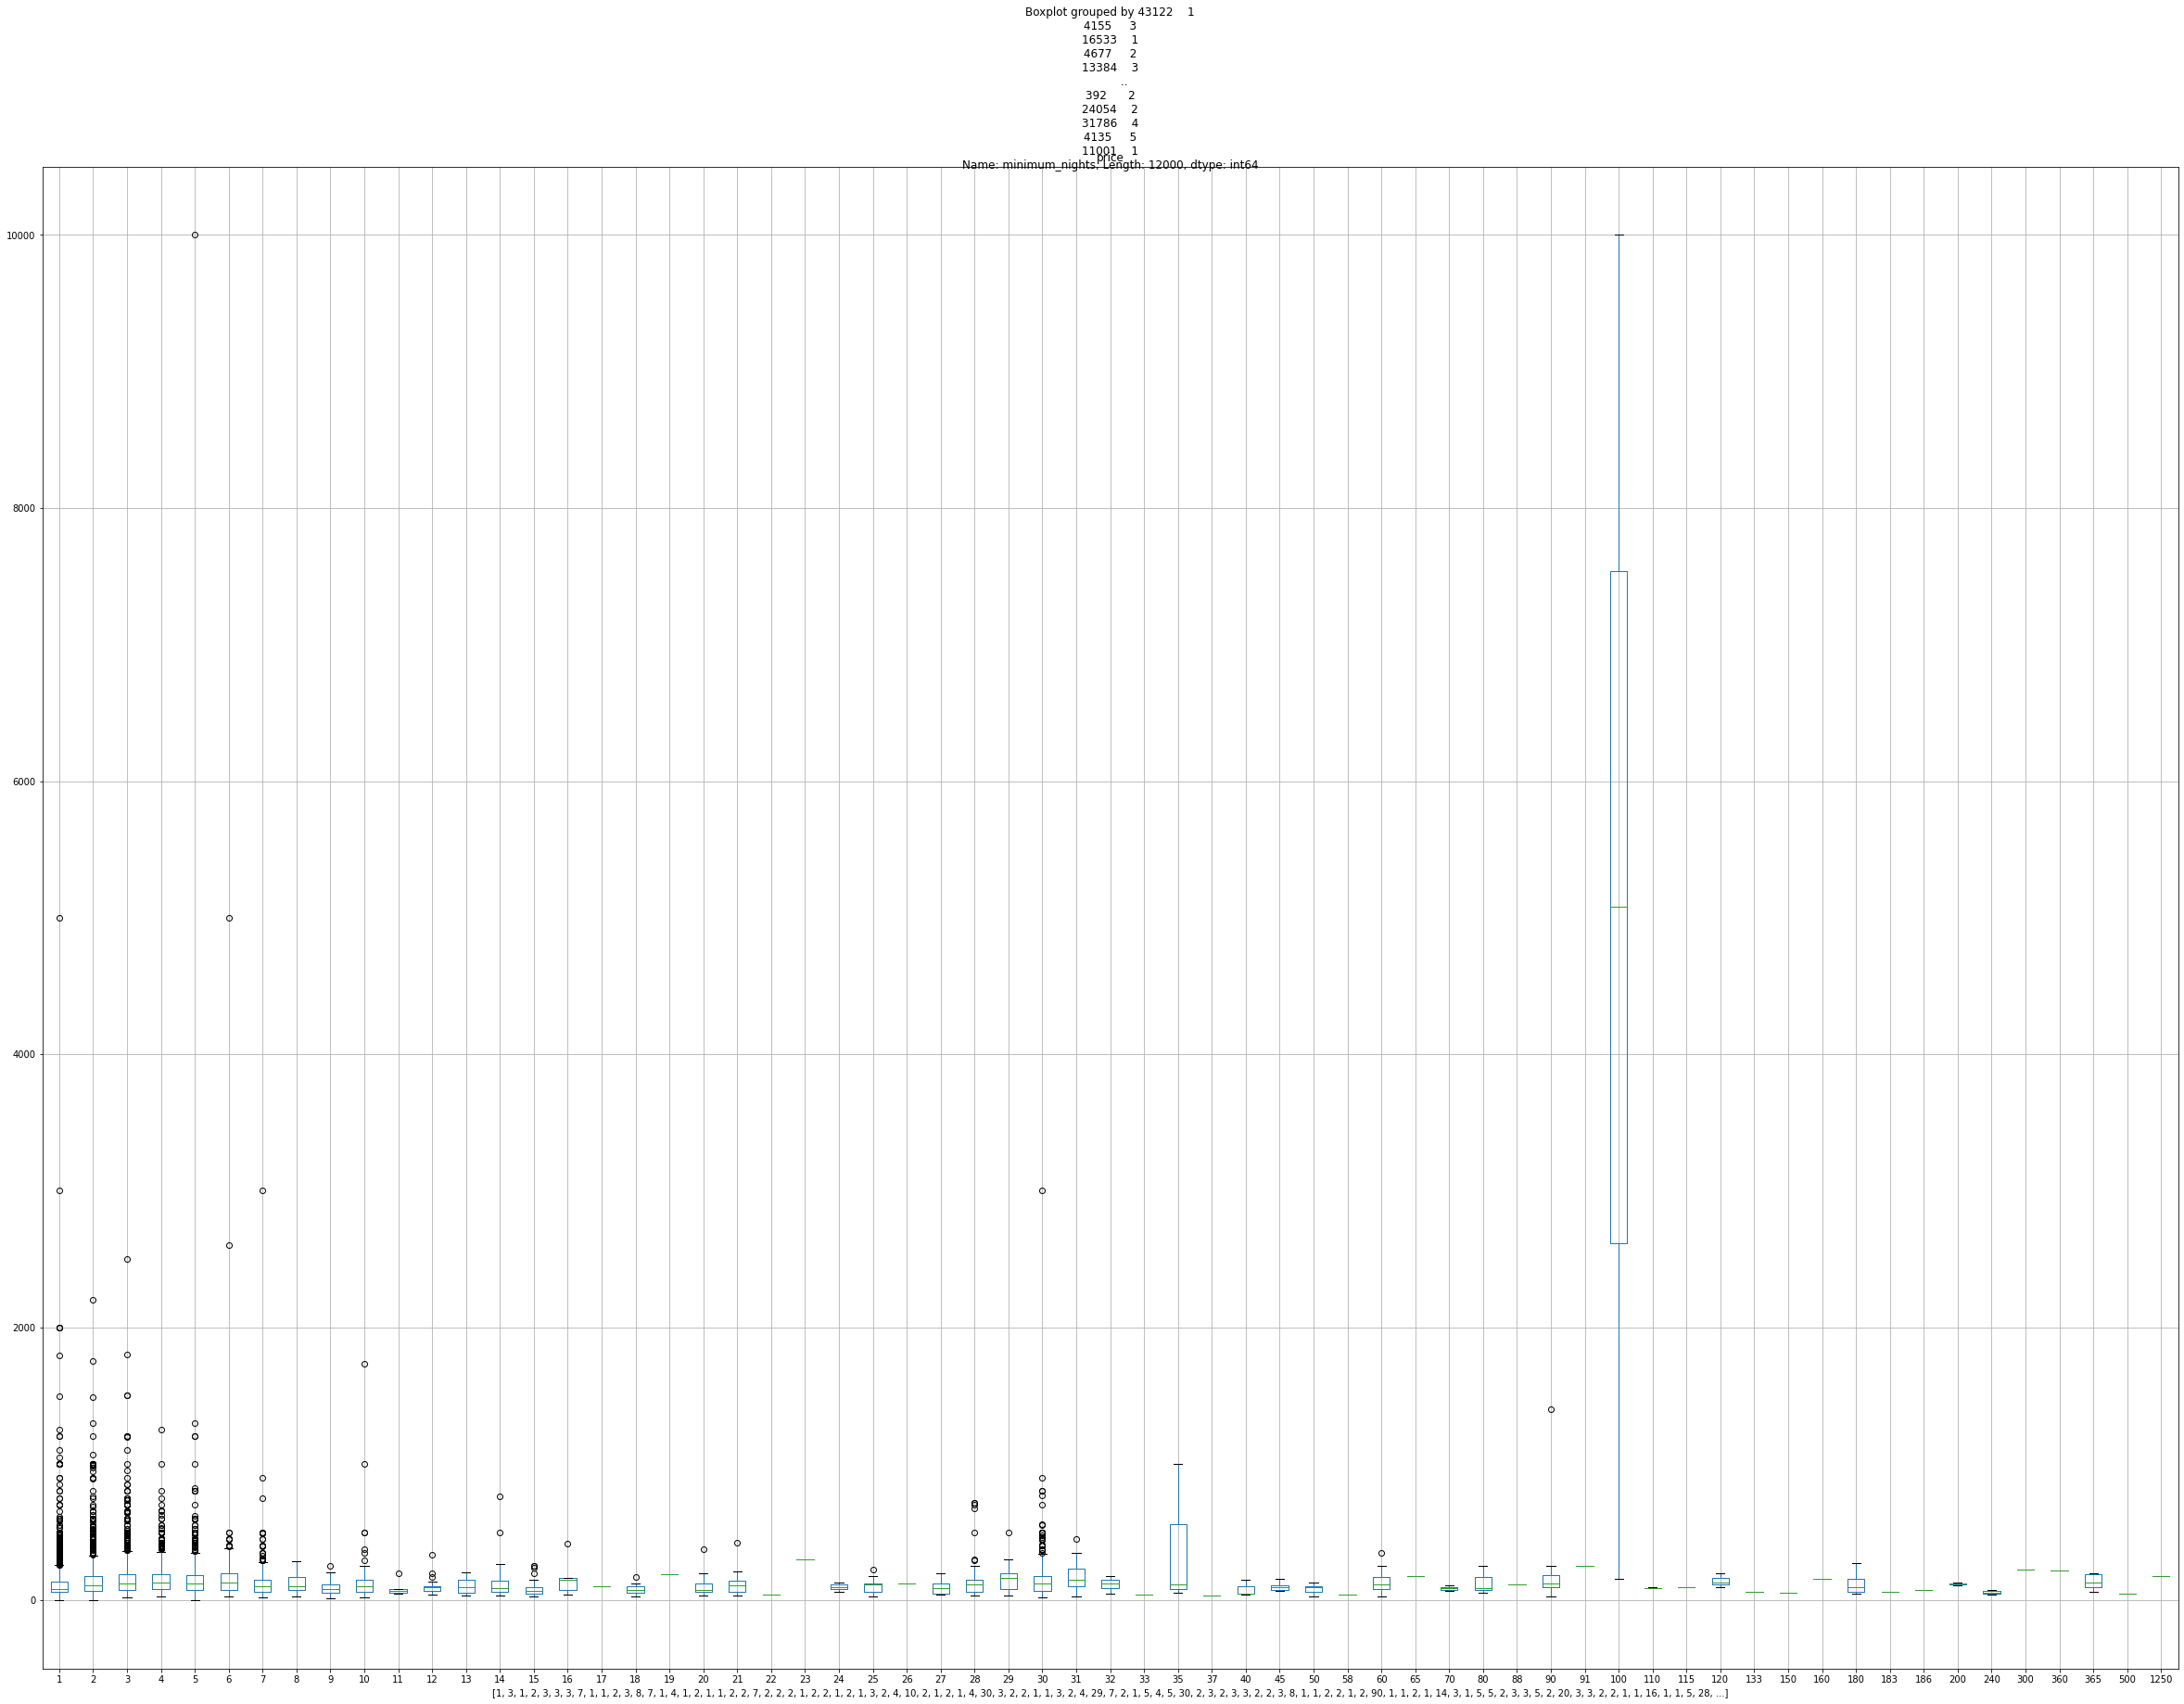

In [40]:
data.boxplot(column='price', by=data.minimum_nights, figsize=(40,30))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


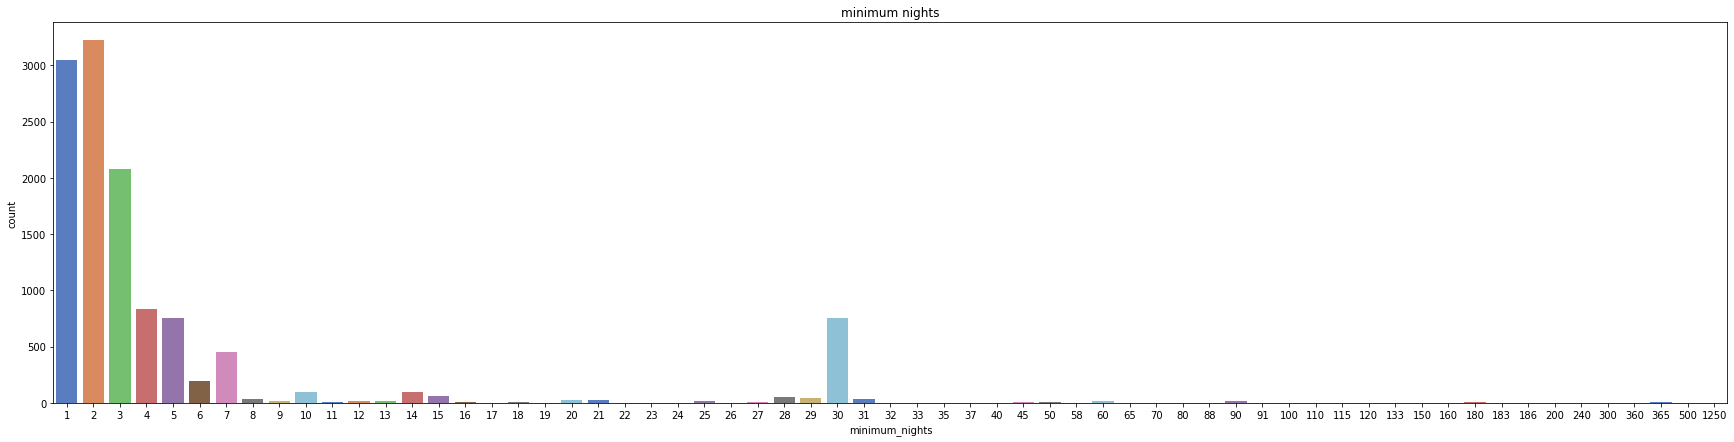

In [41]:
plt.figure(figsize=(30,7))
plt.title("minimum nights")
sns.countplot(data.minimum_nights, palette="muted")
fig = plt.gcf()
plt.show()

In [42]:
import scipy.stats
cor, pval = scipy.stats.spearmanr(data.price, data.minimum_nights)
print('correlation=%.3f, pvalue=%.300f' % (cor, pval))

correlation=0.120, pvalue=0.000000000000000000000000000000000000001962858054513071261569994931726678428405295807606581592530001049336390470068687615391880327684881186577764422551695133734028786420822143554687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [43]:
#normal
cor, pval = scipy.stats.pearsonr(data.price, data.minimum_nights)
print('correlation=%.3f, pvalue=%.5f' % (cor, pval))

correlation=0.024, pvalue=0.00815


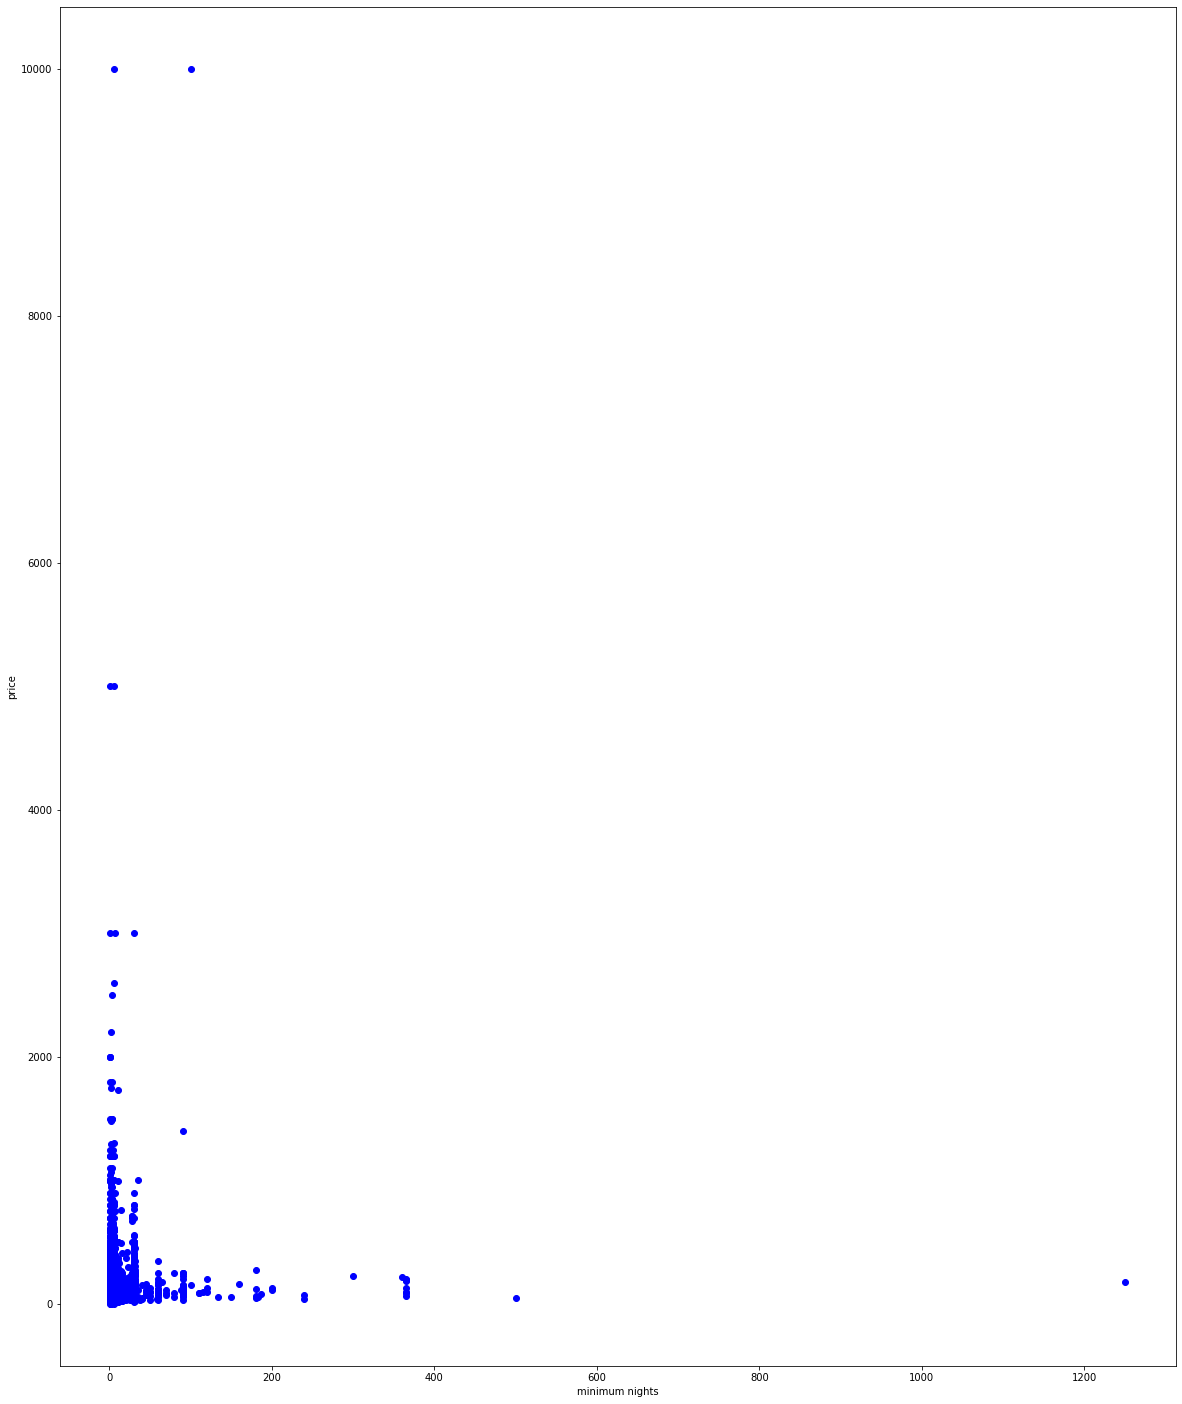

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(20,25))
plt.xlabel('minimum nights')
plt.ylabel('price')
plt.plot(data.minimum_nights, data.price, "bo")

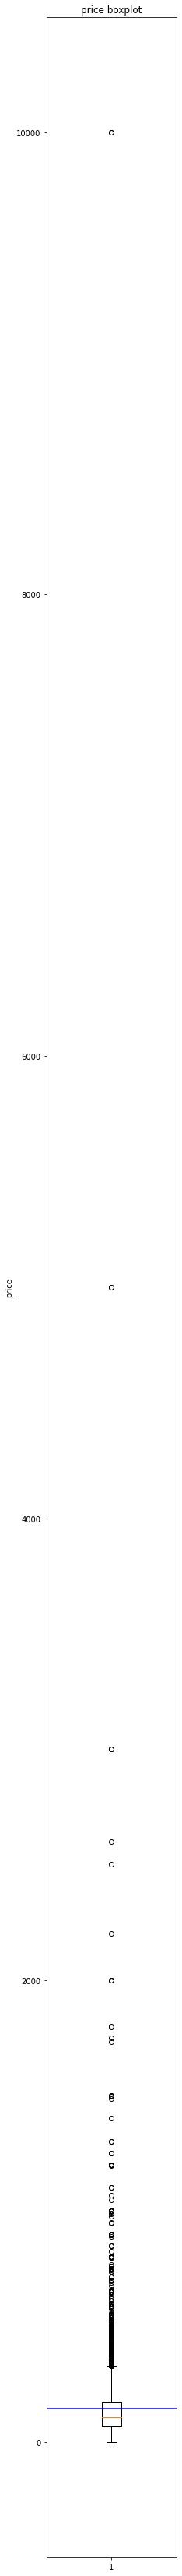

In [45]:
fig, ax = plt.subplots(figsize=(3,60))
ax.set_title('price boxplot')
ax.set_ylabel('price')
ax.boxplot(data.price)
plt.axhline(y= 142.317947, c='b')

In [46]:
top_price = data.price.value_counts().head(10)
top_price

150    482
100    458
50     371
60     343
65     329
75     328
200    328
80     292
70     281
120    273
Name: price, dtype: int64